## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORTING DATASET

IMPORT DATA

In [2]:
data = pd.read_csv('advertising.csv')
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


CREATE DATAFRAME

In [3]:
df =pd.DataFrame(data)
print(df.head(10))

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
5    8.7   48.9       75.0    7.2
6   57.5   32.8       23.5   11.8
7  120.2   19.6       11.6   13.2
8    8.6    2.1        1.0    4.8
9  199.8    2.6       21.2   15.6


## DATAFRAME INFORMATION

BASIC INFORMATION

In [4]:
print(f'Basic Dataframe information:\n')
print(df.info())
print(F'Shape of dataframe:, {df.shape}')

Basic Dataframe information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
Shape of dataframe:, (200, 4)


DATAFRAME STATISTICS

In [5]:
print(f'Database statistics:\n{df.describe()}')

Database statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


COLUMN DESCRIPTION

In [6]:
column_name = df.columns.tolist()
print(f'Column names in the dataframe: {column_name}')
print(f'\nDatatype of each column:\n{df.dtypes}')

Column names in the dataframe: ['TV', 'Radio', 'Newspaper', 'Sales']

Datatype of each column:
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


## DATA CLEANING AND MANIPULATION

NULL VALUES

In [7]:
null_values = df.isnull().sum()
print(f'Null values in each column:\n{null_values}')

Null values in each column:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


## BASIC DATA ANLAYSIS

AVERAGE SPEND

Average spending on TV, Radio and Newspaper:
TV           147.0425
Radio         23.2640
Newspaper     30.5540
dtype: float64


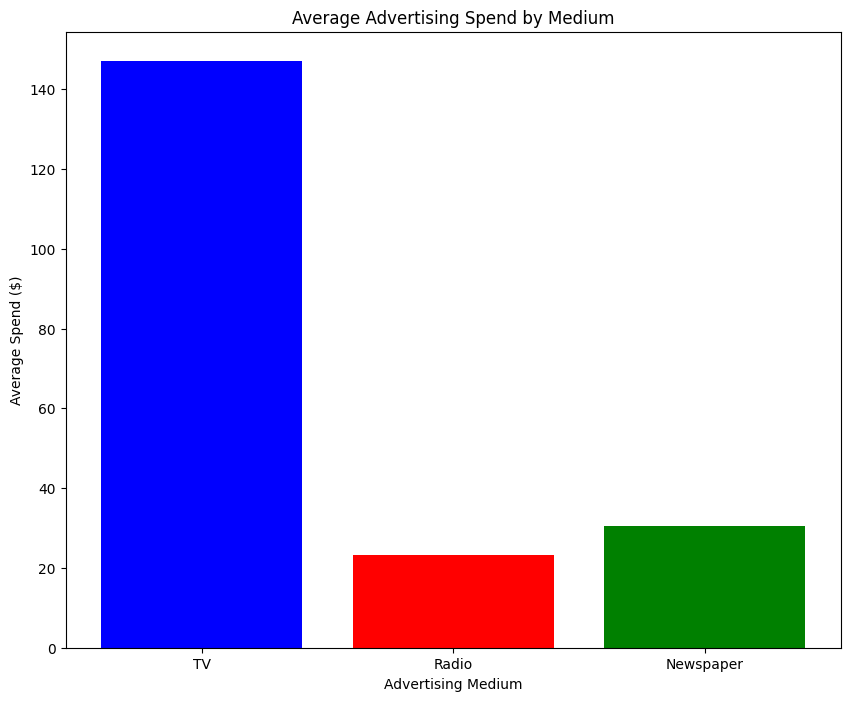

In [8]:
avg_spend = df[['TV','Radio','Newspaper']].mean()
print(f'Average spending on TV, Radio and Newspaper:\n{avg_spend}')
plt.figure(figsize=(10,8))
plt.bar(avg_spend.index, avg_spend.values, color=['blue','red','green'])
plt.title('Average Advertising Spend by Medium')
plt.xlabel('Advertising Medium')
plt.ylabel('Average Spend ($)')
plt.show()

SPEND PERCENTAGE

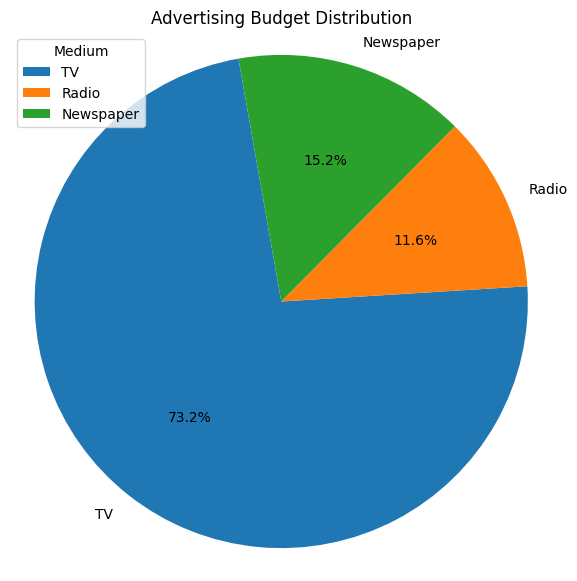

In [9]:
plt.figure(figsize=(7,7))
plt.pie(avg_spend.values, labels=avg_spend.index, autopct='%1.1f%%',startangle=100)
plt.title("Advertising Budget Distribution")
plt.axis('equal')
plt.legend(title="Medium")
plt.show()

TOTAL SPEND

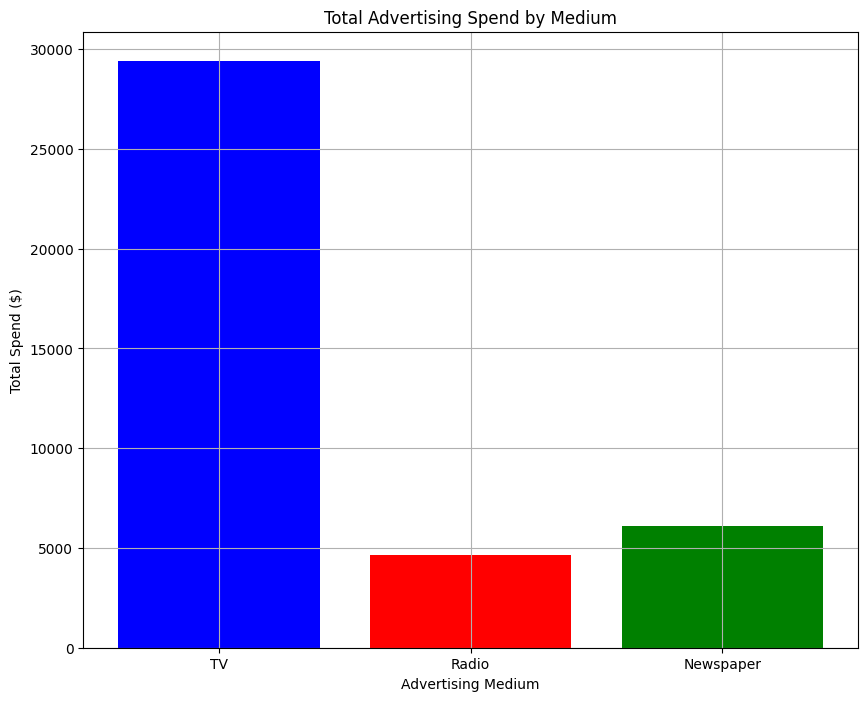

In [10]:
total_spend = df[['TV','Radio','Newspaper']].sum()
plt.figure(figsize=(10,8))
plt.bar(total_spend.index, total_spend.values, color=['blue','red','green'])
plt.title('Total Advertising Spend by Medium')
plt.xlabel('Advertising Medium')
plt.ylabel('Total Spend ($)')
plt.grid(True)
plt.show()

SCATTER PLOT

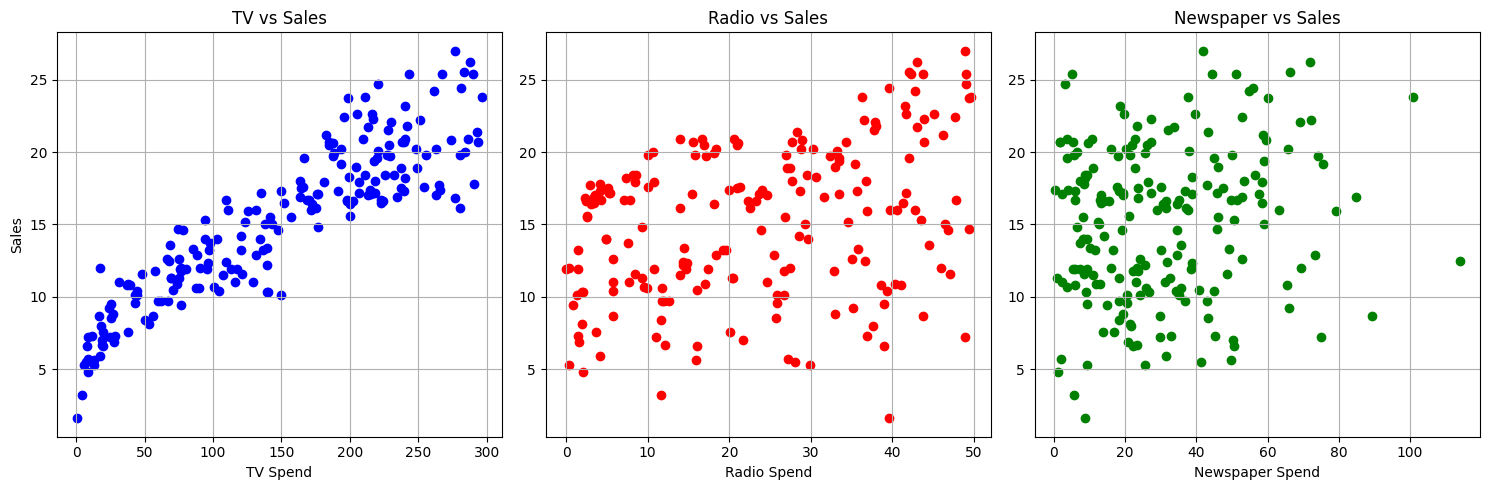

In [11]:

plt.figure(figsize=(15,5))
# TV vs Sales
plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'], color='blue')
plt.xlabel("TV Spend")
plt.ylabel("Sales")
plt.title("TV vs Sales")
plt.grid(True)
# Radio vs Sales
plt.subplot(1, 3, 2)
plt.scatter(df['Radio'], df['Sales'], color='red')
plt.xlabel("Radio Spend")
plt.title("Radio vs Sales")
plt.grid(True)
# Newspaper vs Sales
plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper'], df['Sales'], color='green')
plt.xlabel("Newspaper Spend")
plt.title("Newspaper vs Sales")
plt.grid(True)

plt.tight_layout()
plt.show()


CORRELATION HEATMAP

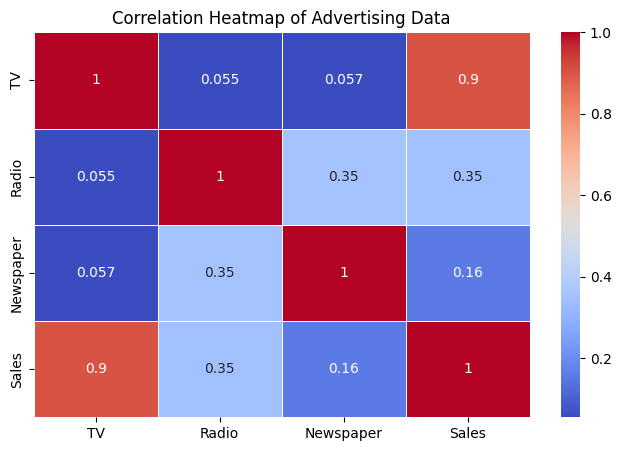

In [12]:
corr = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Advertising Data")
plt.show()

## MODEL BUILDING

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# --DEFINING FEATURES AND TARGET VARIABLE--
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# --BUILDING THE PIPELINE--
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
# --TRAINING THE MODEL--
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
#--EVALUATING THE MODEL--
print(f'---Model Evaluation Metrics---')
model_mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error of model: {model_mse:.2f}')
model_r2 = r2_score(y_test, y_pred)
print(f'R^2 Score of model: {model_r2:.2f}')
model_mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error of model: {model_mae:.2f}')


---Model Evaluation Metrics---
Mean Squared Error of model: 2.91
R^2 Score of model: 0.91
Mean Absolute Error of model: 1.27


PREDICTION SALES

In [14]:
example = pd.DataFrame({
    'TV': [150],
    'Radio': [30],
    'Newspaper': [20]
})

predicted_sales = pipeline.predict(example)[0]
print("\nPredicted Sales for sample data:", predicted_sales)


Predicted Sales for sample data: 16.005610836026452
